In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Mount Google Drive


# Load data
df = pd.read_csv('/kaggle/input/datbetes-read/diabetic_data (1).csv')

In [6]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [3]:

# Encode missing values as NaN
df.replace('?', np.nan, inplace=True)

# Drop columns with more than 50% missing values
df.drop(['weight', 'payer_code','medical_specialty'], axis=1, inplace=True)

In [4]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

In [16]:
df.gender.value_counts()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [9]:
df.replace('Unknown/Invalid',np.nan,inplace=True)

In [10]:
df['gender'].dropna(inplace=True)

In [11]:
df['gender'].value_counts()

gender
Female    54708
Male      47055
Name: count, dtype: int64

In [17]:
df['gender']=df['gender'].fillna(df['gender'].mode()[0])

In [18]:
df['gender'].value_counts()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [19]:
# Convert readmitted column to binary field for target output
df.replace({'readmitted': {"NO": 0, ">30": 0, "<30": 1}}, inplace= True)
df

/tmp/ipykernel_33/2934895029.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'readmitted': {"NO": 0, ">30": 0, "<30": 1}}, inplace= True)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,0
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,0
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,0


In [22]:
df['readmitted'].value_counts()

readmitted
0    90409
1    11357
Name: count, dtype: int64

<Axes: xlabel='readmitted'>

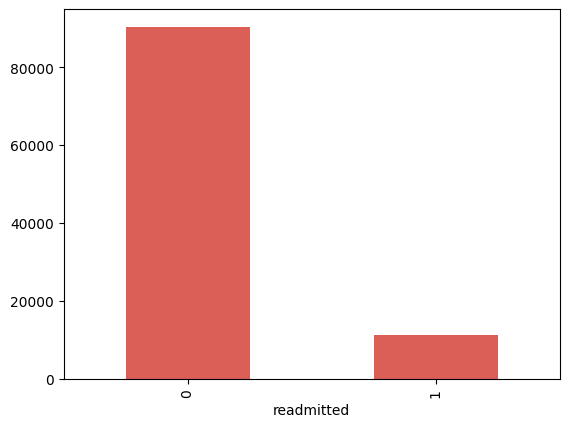

In [24]:
df['readmitted'].value_counts().plot(kind='bar')

<Axes: xlabel='age'>

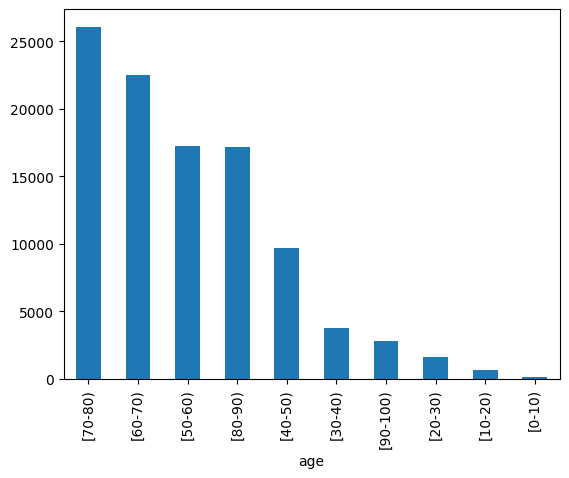

In [18]:
df['age'].value_counts().plot(kind='bar')

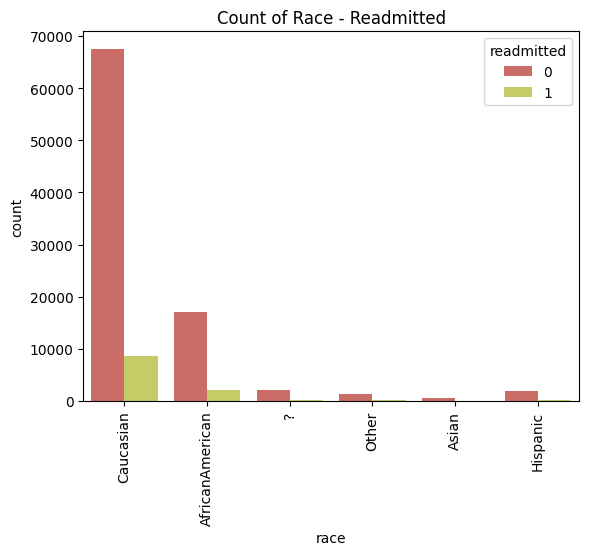

In [25]:
# Show distribution of race
sns.set_palette("hls")
sns.countplot(x='race', hue= "readmitted", data = df)
plt.xticks(rotation=90)
plt.title("Count of Race - Readmitted")
plt.show()

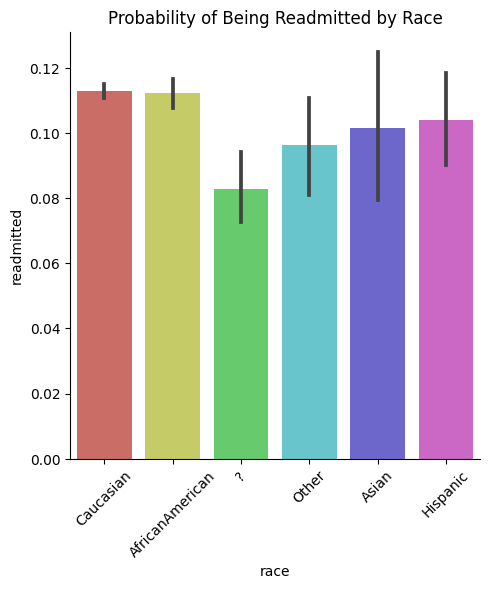

In [26]:
sns.set_palette("hls")
sns.catplot(x = "race", y = "readmitted",
            data = df, kind = "bar", height= 5)
plt.xticks(rotation=45)
plt.title("Probability of Being Readmitted by Race")
plt.show()

In [19]:
# Converting age range to middle values
age_mapping = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}
df['age'] = df['age'].map(age_mapping)

<Axes: xlabel='age'>

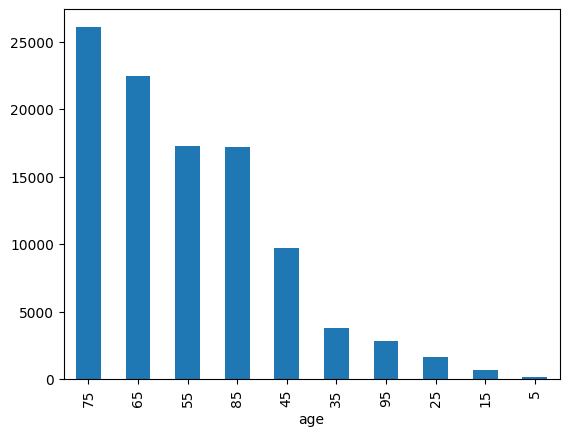

In [20]:
df['age'].value_counts().plot(kind='bar')

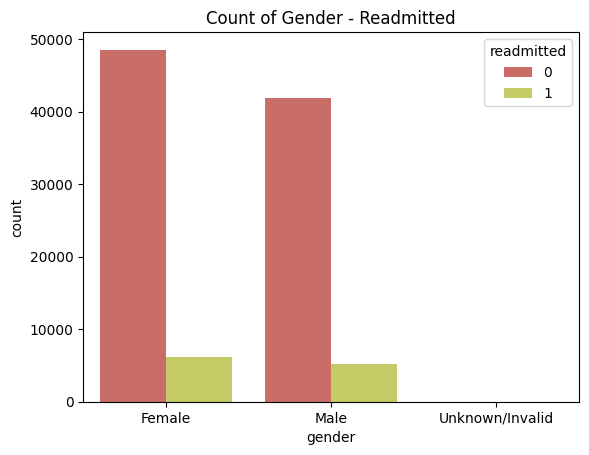

In [27]:
sns.set_palette("hls")
sns.countplot(x='gender', hue= "readmitted", data = df)
plt.title("Count of Gender - Readmitted")
plt.show()

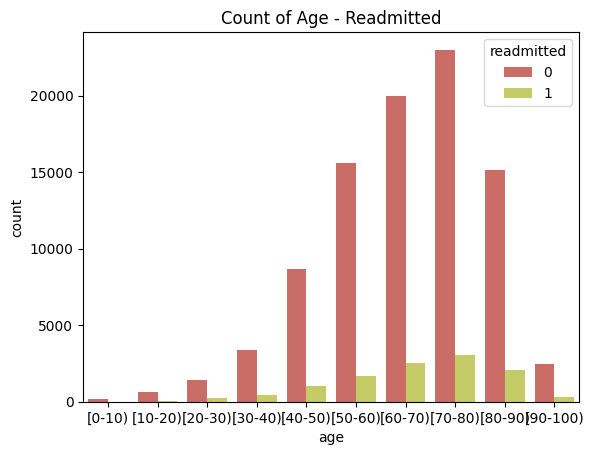

In [28]:
# Show count of age
sns.set_palette("hls")
sns.countplot(x='age', hue= "readmitted", data = df)
plt.title("Count of Age - Readmitted")
plt.show()

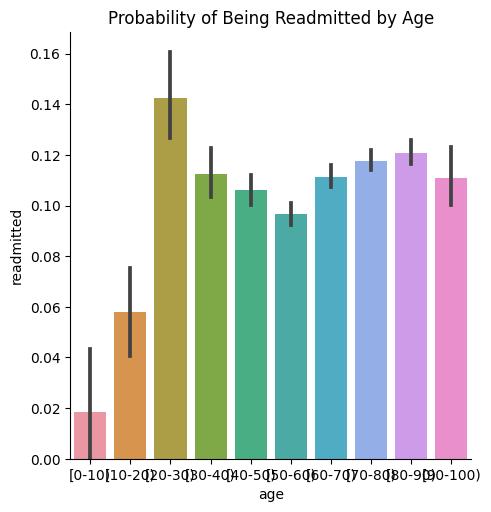

In [29]:
sns.set_palette("hls")
sns.catplot(x = "age", y = "readmitted",
            data = df, kind = "bar", height= 5)
plt.title("Probability of Being Readmitted by Age")
plt.show()

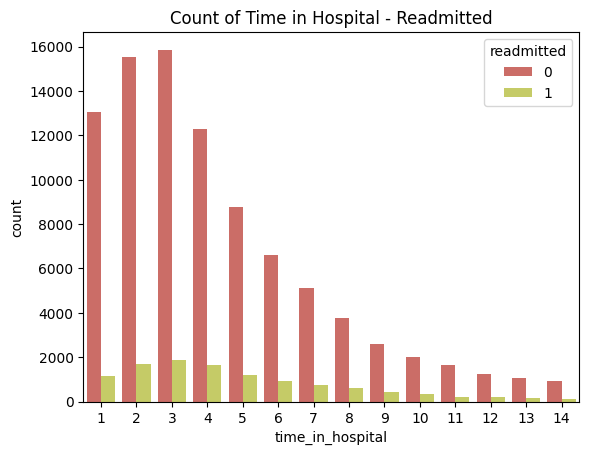

In [30]:
# Show count of TIH
sns.set_palette("hls")
sns.countplot(x='time_in_hospital', hue= "readmitted", data = df)
plt.title("Count of Time in Hospital - Readmitted")
plt.show()

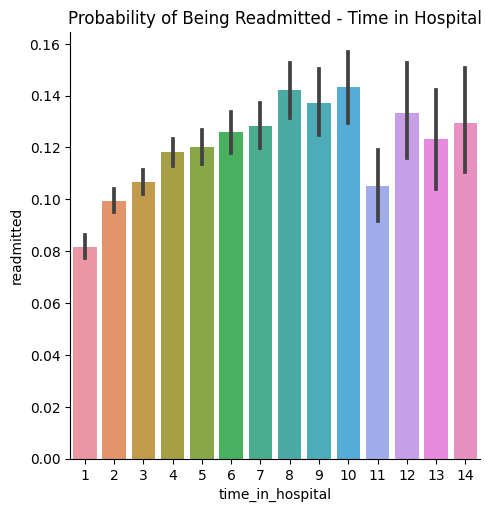

In [31]:
sns.set_palette("hls")
sns.catplot(x = "time_in_hospital", y = "readmitted",
            data = df, kind = "bar", height= 5)
plt.title("Probability of Being Readmitted - Time in Hospital")
plt.show()

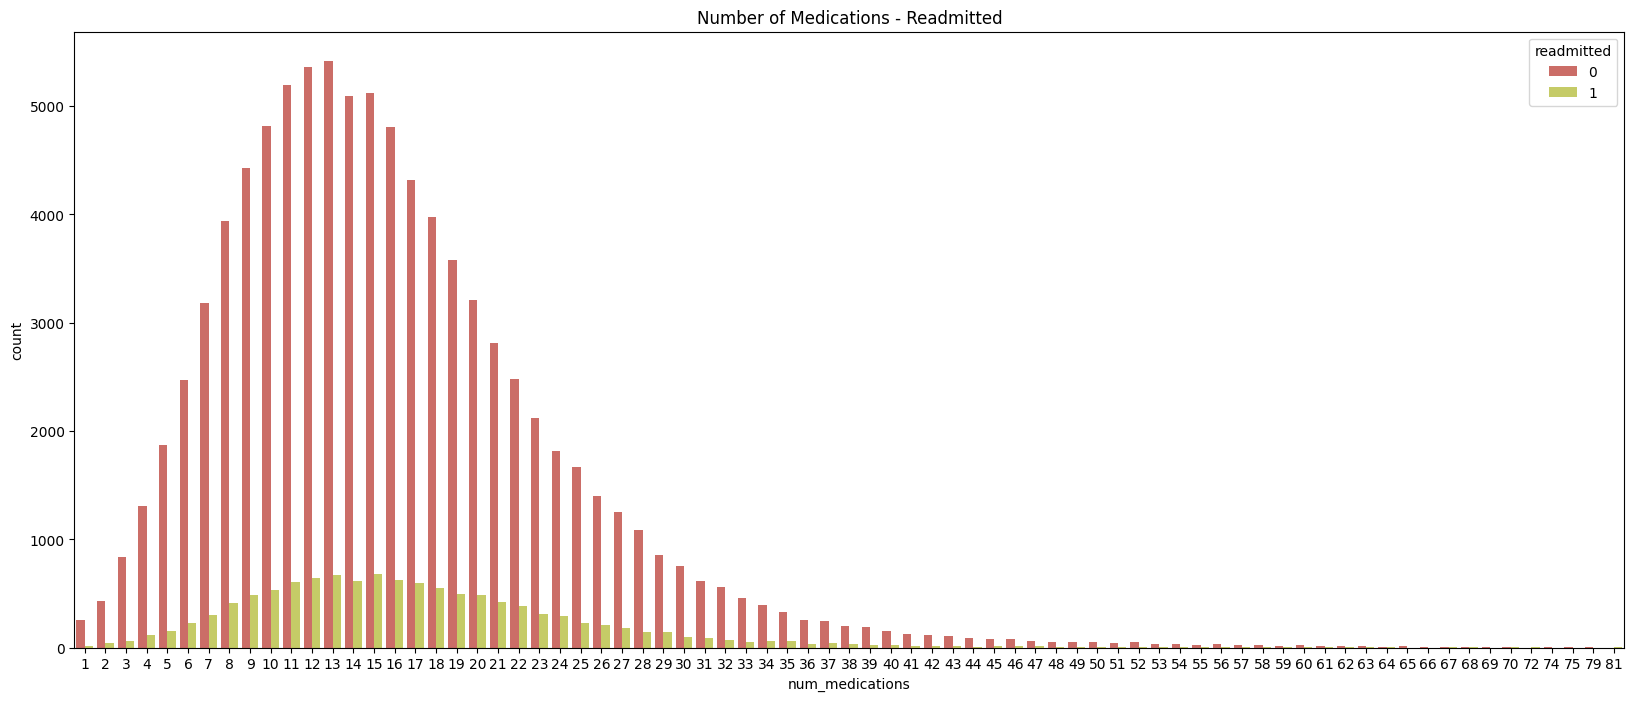

In [32]:
# Show count of num_medications
sns.set_palette("hls")
plt.figure(figsize=(20,8))
sns.countplot(x='num_medications', hue= "readmitted", data = df)
plt.title("Number of Medications - Readmitted")
plt.show()

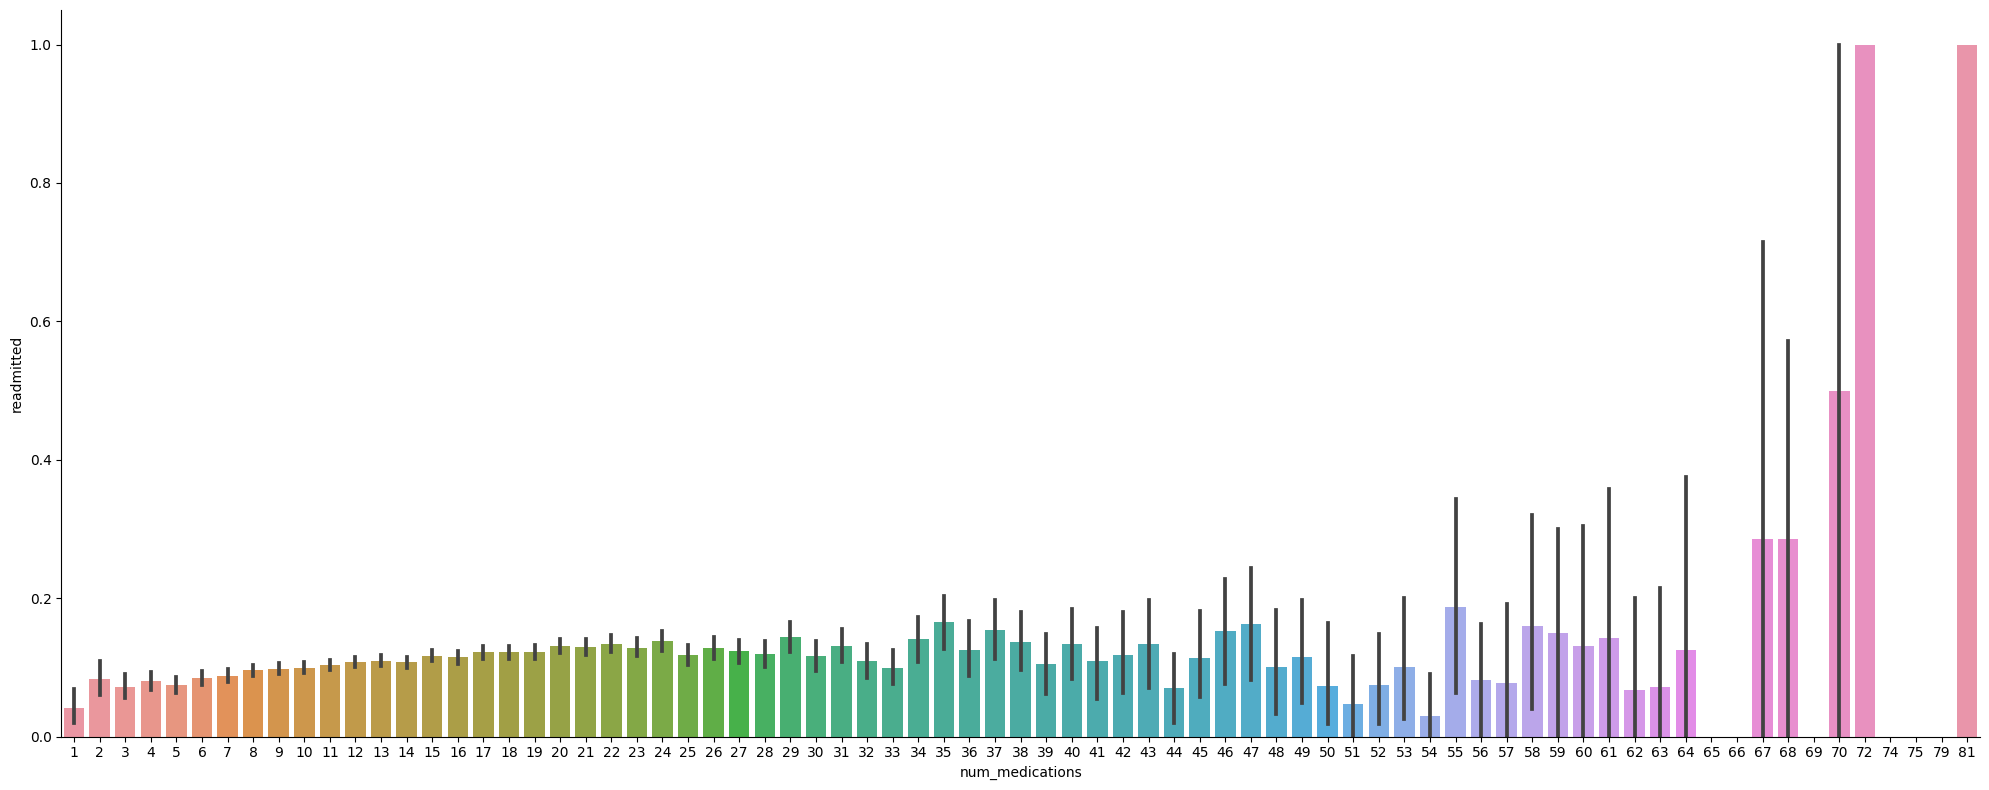

In [33]:
# Show probability of num_medications
sns.set_palette("hls")
sns.catplot(x = "num_medications", y = "readmitted",
            data = df, kind = "bar", height=8, aspect=20/8)

In [21]:
# Define mapping dictionaries
admission_type_mapping = {2: 1, 7: 1, 6: 5, 8: 5}
discharge_disposition_mapping = {6: 1, 8: 1, 9: 1, 3: 2, 4: 2, 5: 2, 22: 2, 23: 2, 24: 2, 12: 10, 15: 10, 16: 10, 17: 10, 18: 25, 26: 25}
admission_source_mapping = {2: 1, 3: 1, 5: 4, 6: 4, 10: 4, 22: 4, 25: 4, 15: 9, 17: 9, 20: 9, 21: 9, 13: 11, 14: 11}

# Apply mappings
df['admission_type_id'] = df['admission_type_id'].replace(admission_type_mapping)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(discharge_disposition_mapping)
df['admission_source_id'] = df['admission_source_id'].replace(admission_source_mapping)

In [24]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']
df.drop(['number_outpatient','number_emergency','number_inpatient'],axis=1,inplace=True)

In [25]:
df.head(10).T


,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,5,15,25,35,45,55,65,75,85,95
admission_type_id,5,1,1,1,1,1,3,1,1,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,2
admission_source_id,1,7,7,7,7,1,1,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12
medical_specialty,Pediatrics-Endocrinology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InternalMedicine


In [1]:
import warnings
from sklearn.metrics import accuracy_score

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Define the preprocessing function
def preprocess_data(df):
    # Encode missing values as NaN
    df.replace('?', np.nan, inplace=True)

    # Drop columns with more than 50% missing values
    df.drop(['weight', 'payer_code'], axis=1, inplace=True)

    # Fill missing values with a new category 'Missing' for 'medical_specialty'
    df['medical_specialty'].fillna('Missing', inplace=True)

    # Fill missing values for numeric columns with mean and for categorical columns with mode
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=[object]).columns

    numeric_imputer = SimpleImputer(strategy='mean')
    df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

    # Encode 'readmitted' to binary classes
    df['readmitted'] = df['readmitted'].replace({'<30':1 , '>30': 0,'NO': 1})

    # Drop patients with expired discharge disposition or discharged to hospice
    df = df[~df['discharge_disposition_id'].isin([11, 19, 20, 21])]

    # Keep only the first encounter for each patient
    df = df.sort_values(by=['patient_nbr', 'encounter_id']).drop_duplicates(subset=['patient_nbr'], keep='first')

    # Encode 'age' as discrete
    age_dict = {'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45, '[50-60)': 55,
                '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95}
    df['age'] = df['age'].map(age_dict)

    # Clustering diagnosis codes into 9 categories
    def cluster_diag(diag):
        if diag.startswith('250'):
            return 'Diabetes'
        elif diag.startswith('390') or diag.startswith('459') or diag.startswith('785'):
            return 'Circulatory'
        elif diag.startswith('460') or diag.startswith('519') or diag.startswith('786'):
            return 'Respiratory'
        elif diag.startswith('520') or diag.startswith('579') or diag.startswith('787'):
            return 'Digestive'
        elif diag.startswith('800') or diag.startswith('999'):
            return 'Injury'
        elif diag.startswith('710') or diag.startswith('739'):
            return 'Musculoskeletal'
        elif diag.startswith('580') or diag.startswith('629'):
            return 'Genitourinary'
        elif diag.startswith('140') or diag.startswith('239'):
            return 'Neoplasms'
        else:
            return 'Other'

    df['diag_1'] = df['diag_1'].apply(cluster_diag)
    df['diag_2'] = df['diag_2'].apply(cluster_diag)
    df['diag_3'] = df['diag_3'].apply(cluster_diag)

    # Clustering 'medical_specialty' and other variables
    df['medical_specialty'] = df['medical_specialty'].apply(lambda x: 'Surgery' if 'Surgery' in x else x)

    # Encoding categorical variables
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Feature engineering
    df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']
    df['count_medication_change'] = df[['change']].apply(lambda x: x.count(), axis=1)
    df['count_medication_used'] = df[['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
                                      'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
                                      'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                                      'miglitol', 'troglitazone', 'tolazamide', 'examide',
                                      'citoglipton', 'insulin', 'glyburide-metformin', 
                                      'glipizide-metformin', 'glimepiride-pioglitazone', 
                                      'metformin-rosiglitazone', 'metformin-pioglitazone']].apply(lambda x: (x != 'No').sum(), axis=1)

    # Drop columns with uniform values
    df.drop(['examide', 'citoglipton'], axis=1, inplace=True)

    # Log transformation for skewed numeric columns
    skewed_cols = ['num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses']
    df[skewed_cols] = df[skewed_cols].apply(lambda x: np.log1p(x))

    # Standardize numeric columns
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    r=df['readmitted']
    df.drop('readmitted',axis=1,inplace=True)
    df=df[['race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_inpatient', 'number_diagnoses', 'A1Cresult', 'metformin',
       'glipizide', 'glyburide', 'pioglitazone', 'insulin', 'change',
       'diabetesMed', 'service_utilization']]
    return df,r

# Example usage
df= pd.read_csv('/kaggle/input/datbetes-read/diabetic_data (1).csv')

print(df['readmitted'].value_counts())
df_processed,actual = preprocess_data(df)
df_processed

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,service_utilization,count_medication_change,count_medication_used
4267,-1.319255,-1.392740,2,0,5,-0.069662,-0.474176,-1.114302,1.264267,3,...,1,0,0,0,0,0,1,0.0,1,23
5827,-1.266267,-1.392734,2,0,5,0.593081,-0.474176,-1.114302,-0.776798,58,...,1,0,0,0,0,1,0,0.0,1,23
67608,0.328261,-1.392725,2,0,8,-0.732406,-0.091533,0.326253,-0.096443,18,...,1,0,0,0,0,1,1,0.0,1,23
17494,-0.922025,-1.392724,2,0,8,-0.732406,-0.474176,0.326253,-0.436620,18,...,1,0,0,0,0,0,1,0.0,1,23
2270,-1.414972,-1.392720,0,0,3,-0.732406,-0.474176,0.326253,0.243735,18,...,1,0,0,0,0,1,1,0.0,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99863,2.604582,3.402754,2,0,8,-0.732406,-0.474176,0.326253,-1.116975,19,...,1,0,0,0,0,1,0,0.0,1,23
95282,2.019167,3.403128,4,1,6,-0.732406,-0.474176,0.326253,-0.436620,18,...,1,0,0,0,0,1,1,0.0,1,23
93651,1.807518,3.405136,2,0,8,-0.732406,-0.474176,0.326253,-0.436620,19,...,1,0,0,0,0,0,1,0.0,1,23
101748,2.856480,3.406056,2,0,4,-0.732406,0.099788,0.326253,3.305332,19,...,1,0,0,0,0,0,1,0.0,1,23


In [ ]:
import lightgbm as lgb
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Create a sample dataset (replace this with your actual data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_processed,actual, test_size=0.2, random_state=42)

# Create a LightGBM classifier
lgb_estimator = lgb.LGBMClassifier()

# Create an RFE object with the LightGBM estimator
rfe = RFE(estimator=lgb_estimator, n_features_to_select=10, step=1)

# Fit the RFE model
rfe.fit(X_train, y_train)

# Transform the training and testing sets based on the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fit the LightGBM model on the selected features
lgb_estimator.fit(X_train_rfe, y_train)

# Predict on the test set
y_pred = lgb_estimator.predict(X_test_rfe)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with selected features: {accuracy:.4f}')

'''# Find optimal number of features using cross-validation
best_score = 0
best_n_features = 0
for n in range(1,20):
    rfe = RFE(estimator=lgb_estimator, n_features_to_select=n)
    scores = cross_val_score(rfe, X_train, y_train, cv=5, scoring='accuracy')
    score = scores.mean()
    if score > best_score:
        best_score = score
        best_n_features = n

print(f'Best number of features: {best_n_features}')
print(f'Best cross-validated accuracy: {best_score:.4f}')'''


In [9]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Assuming 'df' is the preprocessed dataframe and 'r' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_processed,actual, test_size=0.2, random_state=42)



# Define the LightGBM classifier
lgb_clf = LGBMClassifier()
#s=SMOTE(random_state=42)
#Xtr,Ytr=s.fit_resample(X_train,y_train)
# Define the pipeline with SMOTE and LightGBM
# Define the pipeline with SMOTE and XGBoost
pipeline = imbpipeline([
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('classifier', lgb_clf)
])

# Use TPOT to find the best hyperparameters for the pipeline
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=1, config_dict={'lightgbm.LGBMClassifier': {}})
tpot.fit(X_train, y_train)

# Evaluate the model
accuracy = tpot.score(X_test, y_test)

print(f'Accuracy: {accuracy:.4f}')

# Export the best pipeline
tpot.export('best_pipeline.py')


Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


[LightGBM] [Info] Number of positive: 38, number of negative: 12
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.760000 -> initscore=1.152680
[LightGBM] [Info] Start training from score 1.152680
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,classification_report
from tensorflow.keras.models import Sequential
# Retrieve the best pipeline
best_pipeline = tpot.fitted_pipeline_

# Fit the pipeline on the entire training data
best_pipeline.fit(X_train, y_train)

# Extract the RFE step
rfe = best_pipeline.predict(X_test)

print(accuracy_score(y_test,rfe))
print(classification_report(y_test,rfe))

2024-07-11 15:28:21.643445: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 15:28:21.643625: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 15:28:21.795270: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[LightGBM] [Info] Number of positive: 38603, number of negative: 17748
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 56351, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.685046 -> initscore=0.777057
[LightGBM] [Info] Start training from score 0.777057
0.6986087450312323
              precision    recall  f1-score   support

           0       0.58      0.21      0.30      4494
           1       0.71      0.93      0.81      9594

    accuracy                           0.70     14088
   macro avg       0.65      0.57      0.56     14088
weighted avg       0.67      0.70      0.65     14088



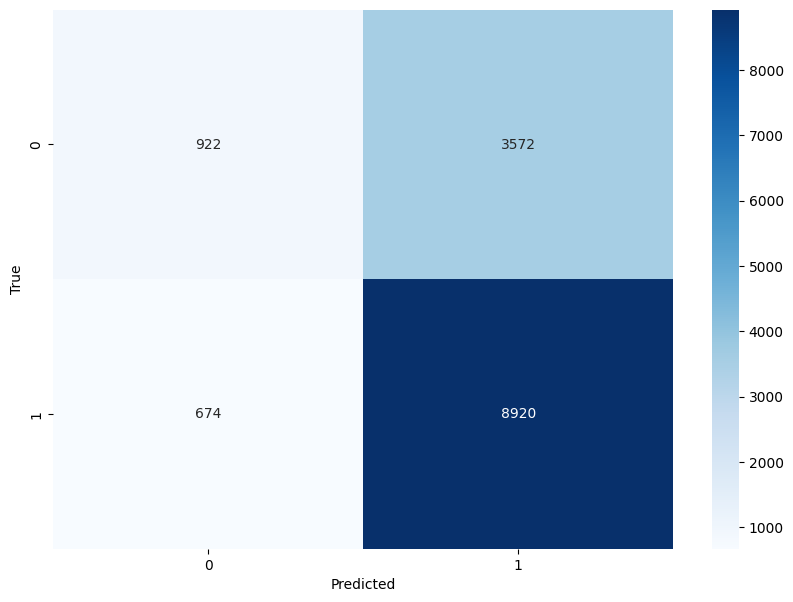

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
plot_confusion_matrix(y_test,rfe.round())

In [2]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from lightgbm import LGBMClassifier
import warnings

# Suppress DeprecationWarnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Assuming 'df_processed' is the preprocessed dataframe and 'actual' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_processed, actual, test_size=0.2, random_state=42)

# Define the LightGBM classifier
lgb_clf = LGBMClassifier()

# Define the pipeline with SMOTE and LightGBM
pipeline = imbpipeline([
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('classifier', lgb_clf)
])

# Define a custom configuration for TPOT with different genetic operators
tpot_config = {
    'sklearn.ensemble.RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7, 9],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'sklearn.ensemble.GradientBoostingClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5, 6],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'sklearn.linear_model.LogisticRegression': {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    'sklearn.feature_selection.SelectFromModel': {
        'estimator': [
            'sklearn.ensemble.ExtraTreesClassifier',
            'sklearn.ensemble.GradientBoostingClassifier'
        ],
        'threshold': ['mean', 'median', '1.25*mean']
    },
    'sklearn.preprocessing.PolynomialFeatures': {
        'degree': [2, 3, 4],
        'include_bias': [True, False]
    }
}

# Use TPOT with the custom configuration
tpot3= TPOTClassifier(
    generations=10,
    population_size=20,
    verbosity=2,
    config_dict=tpot_config,
    cv=5,  # Cross-validation folds
    scoring='f1',  # Use F1-score for evaluation
    early_stop=3,  # Stop early if no improvement in 3 generations
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit TPOT
tpot3.fit(X_train, y_train)

# Evaluate the best pipeline
accuracy = tpot.score(X_test, y_test)
y_pred = tpot.predict(X_test)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Export the best pipeline
tpot3.export('/kaggle/working/best_pipeline.py')


Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]

RuntimeError: A pipeline has not yet been optimized. Please call fit() first.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter



# Split data
X_train, X_test, y_train, y_test = train_test_split(df_processed,actual, test_size=0.2, random_state=42)

Estimated number of clusters: 18
Estimated number of noise points: 56216


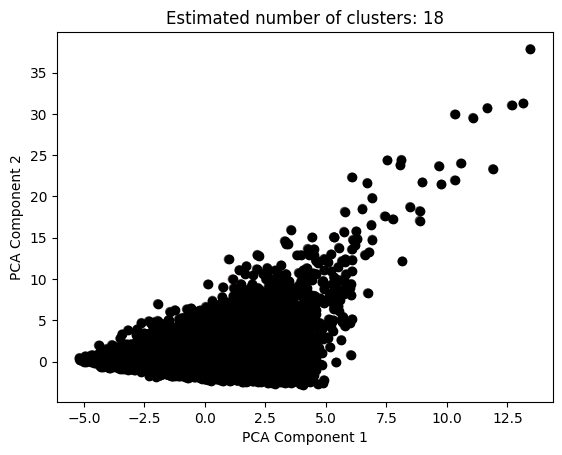

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Assuming df_processed is your processed DataFrame and actual is your target variable (readmission status)
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_processed, actual, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convert y_train to numpy array and reshape
y_train_np = y_train.to_numpy().reshape(-1, 1)

# Include the readmission status in the data
X_train_scaled_with_target = np.hstack((X_train_scaled, y_train_np))

# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(X_train_scaled_with_target)  # Adjust eps and min_samples as needed
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# Reduce the data to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot result
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_train_pca[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14 if k != -1 else 6)

# Add readmission status to the plot
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.6, edgecolors='k')

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


Estimated number of clusters: 2


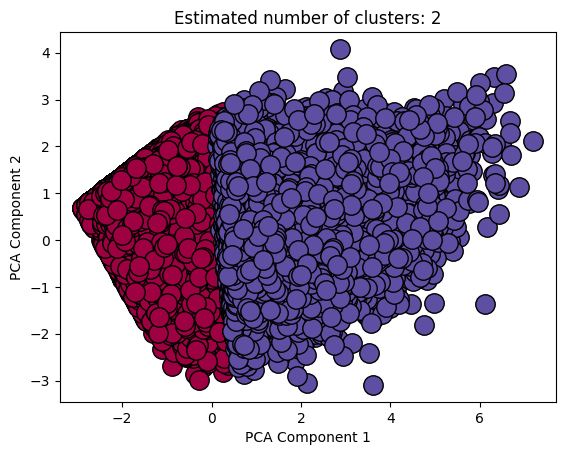

Silhouette Score: 0.36
Adjusted Rand Index: 0.01
Adjusted Mutual Information Score: 0.00


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score

# Assuming df_processed is your processed DataFrame and actual is your target variable (readmission status)
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['num_medications','time_in_hospital','num_lab_procedures']],df['readmitted'], test_size=0.2, random_state=42)
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train_scaled)  # Adjust n_clusters as needed
labels = kmeans.labels_

# Number of clusters in labels
n_clusters_ = len(set(labels))

print(f"Estimated number of clusters: {n_clusters_}")

# Reduce the data to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot result
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    xy = X_train_pca[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14 if k != -1 else 6)

# Add readmission status to the plot
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.6, edgecolors='k')

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Calculate and print evaluation metrics
sil_score = silhouette_score(X_train_scaled, labels)
ari_score = adjusted_rand_score(y_train, labels)
ami_score = adjusted_mutual_info_score(y_train, labels)

print(f"Silhouette Score: {sil_score:.2f}")
print(f"Adjusted Rand Index: {ari_score:.2f}")
print(f"Adjusted Mutual Information Score: {ami_score:.2f}")


In [29]:
y_pred_kmeans1=kmeans.predict(X_test)
accuracy_score(y_pred_kmeans1,y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


0.5380760538469097

Estimated number of clusters: 2
Silhouette Score: 0.08
Adjusted Rand Index: 0.00
Adjusted Mutual Information Score: 0.00


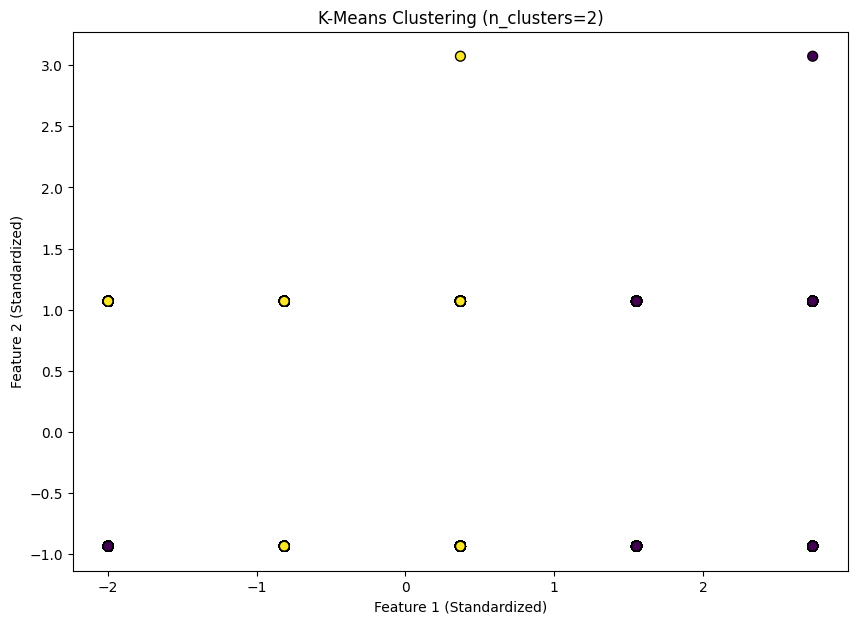

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score

# Assuming df_processed is your processed DataFrame and actual is your target variable (readmission status)
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_processed, actual, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train_scaled)  # Adjust n_clusters as needed
labels = kmeans.labels_

# Number of clusters in labels
n_clusters_ = len(set(labels))

print(f"Estimated number of clusters: {n_clusters_}")

# Calculate and print evaluation metrics
sil_score = silhouette_score(X_train_scaled, labels)
ari_score = adjusted_rand_score(y_train, labels)
ami_score = adjusted_mutual_info_score(y_train, labels)

print(f"Silhouette Score: {sil_score:.2f}")
print(f"Adjusted Rand Index: {ari_score:.2f}")
print(f"Adjusted Mutual Information Score: {ami_score:.2f}")

# Plot the clusters (2D plot using the first two features for simplicity)
plt.figure(figsize=(10, 7))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title(f"K-Means Clustering (n_clusters={n_clusters_})")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.show()


Accuracy: 0.6023566155593413
              precision    recall  f1-score   support

           0       0.62      0.91      0.74      8310
           1       0.30      0.01      0.02      1284
           2       0.49      0.21      0.29      4494

    accuracy                           0.60     14088
   macro avg       0.47      0.37      0.35     14088
weighted avg       0.55      0.60      0.53     14088



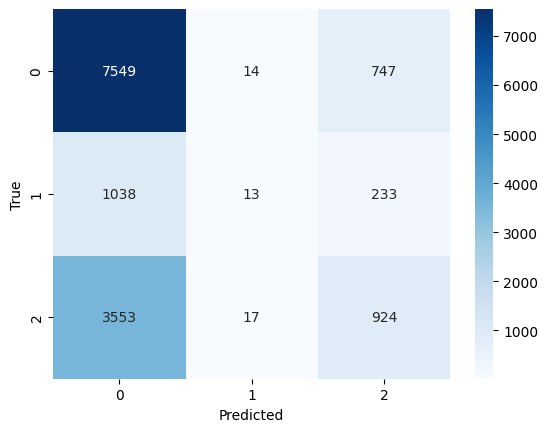

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter



# Split data
X_train, X_test, y_train, y_test = train_test_split(df_processed,actual, test_size=0.2, random_state=42)
'''from imblearn.under_sampling import RandomUnderSampler

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
'''
# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')

# Train the model
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)



print(f'Accuracy: {accuracy}')

print(classification_report(y_test,y_pred))
plot_confusion_matrix(y_test,y_pred)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:43:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.63      0.90      0.74      8310
           1       0.41      0.03      0.06      1284
           2       0.51      0.24      0.33      4494

    accuracy                           0.61     14088
   macro avg       0.52      0.39      0.38     14088
weighted avg       0.57      0.61      0.55     14088



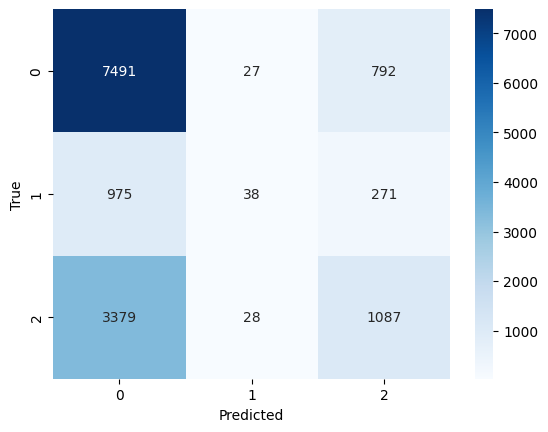

In [51]:
import xgboost as xgb

# Define the XGBoost classifier
clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42,class_weight='balanced')

# Train the model
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
plot_confusion_matrix(y_test,y_pred)

[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 56351, number of used features: 23
[LightGBM] [Info] Start training from score -0.517342
[LightGBM] [Info] Start training from score -1.155327
[LightGBM] [Info] Start training from score -2.419765
[LightGBM] [Warning] Unknown parameter: class_weights
              precision    recall  f1-score   support

           0       0.63      0.92      0.75      8310
           1       0.52      0.20      0.29      4494
           2       0.50      0.01      0.03      1284

    accuracy                           0.61     14088
   macro avg       0.55      0.38      0.36     1408

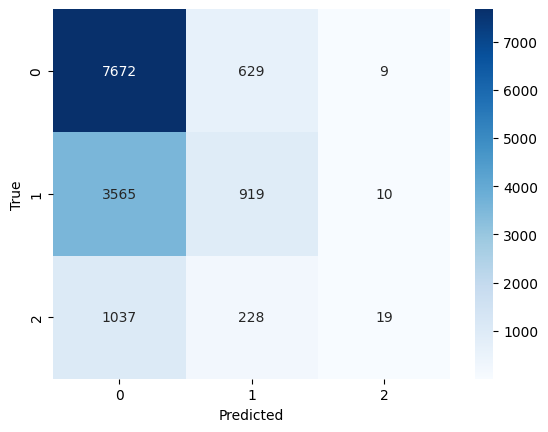

In [47]:
import lightgbm as lgb

# Define the LightGBM classifier
clf = lgb.LGBMClassifier(random_state=42,class_weights='balanced')

# Train the model
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print(f'AUC: {auc}')

plot_confusion_matrix(y_test,y_pred)

Accuracy: 0.5924190800681431
Precision: 0.5028827674567585
Recall: 0.5434406368985808
AUC: 0.5849573822278704
              precision    recall  f1-score   support

           0       0.66      0.63      0.64      8310
           1       0.50      0.54      0.52      5778

    accuracy                           0.59     14088
   macro avg       0.58      0.58      0.58     14088
weighted avg       0.60      0.59      0.59     14088



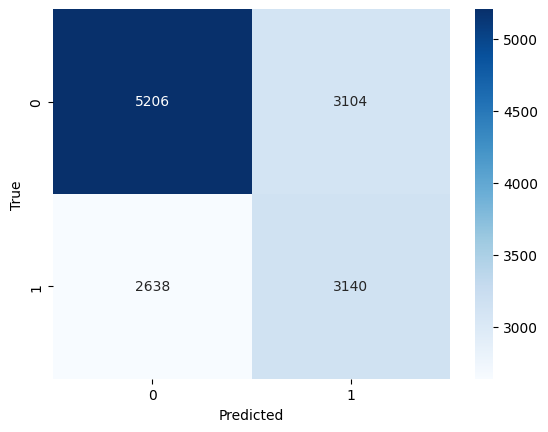

In [35]:
from sklearn.linear_model import LogisticRegression
# Initialize the LogisticRegression
clf = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Train the model
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'AUC: {auc}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

In [4]:

df_transformed = df[["race", "gender", "age", "time_in_hospital", 'num_procedures', 'num_medications', "readmitted"]]
df_transformed
df=df_transformed
age_dict = {'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45, '[50-60)': 55,
                '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95}
df['age'] = df['age'].map(age_dict)

In [5]:
import pandas as pd
df.replace(['?','Unknown/Invalid'],pd.NA,inplace=True)
print(df.isnull().sum())
df.dropna(inplace=True)

race                2273
gender                 3
age                    0
time_in_hospital       0
num_procedures         0
num_medications        0
readmitted             0
dtype: int64


In [6]:
df.shape

(99492, 7)

In [7]:
df

,race,gender,age,time_in_hospital,num_procedures,num_medications,readmitted
0,Caucasian,Female,5,1,0,1,NO
1,Caucasian,Female,15,3,0,18,>30
2,AfricanAmerican,Female,25,2,5,13,NO
3,Caucasian,Male,35,2,1,16,NO
4,Caucasian,Male,45,1,0,8,NO
...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,75,3,0,16,>30
101762,AfricanAmerican,Female,85,5,3,18,NO
101763,Caucasian,Male,75,1,0,9,NO
101764,Caucasian,Female,85,10,2,21,NO


In [68]:
df.isnull().sum()

race                0
gender              0
age                 0
time_in_hospital    0
num_procedures      0
num_medications     0
readmitted          0
dtype: int64

In [8]:
cat_data = df.select_dtypes('O')
num_data = df.select_dtypes(np.number)
cat_data

,race,gender,readmitted
0,Caucasian,Female,NO
1,Caucasian,Female,>30
2,AfricanAmerican,Female,NO
3,Caucasian,Male,NO
4,Caucasian,Male,NO
...,...,...,...
101761,AfricanAmerican,Male,>30
101762,AfricanAmerican,Female,NO
101763,Caucasian,Male,NO
101764,Caucasian,Female,NO


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['race'])
integer_mapping = {l: i for i, l in enumerate(le.classes_)}
integer_mapping

{'AfricanAmerican': 0, 'Asian': 1, 'Caucasian': 2, 'Hispanic': 3, 'Other': 4}

In [10]:
import pandas as pd
df.replace(['?','Unknown/Invalid'],pd.NA,inplace=True)
print(df.isnull().sum())
df.dropna(inplace=True)

race                0
gender              0
age                 0
time_in_hospital    0
num_procedures      0
num_medications     0
readmitted          0
dtype: int64


In [11]:
le = LabelEncoder()
le.fit(df['gender'])
integer_mapping = {l: i for i, l in enumerate(le.classes_)}
integer_mapping

{'Female': 0, 'Male': 1}

In [12]:
# Encode categorical data
le = LabelEncoder()
for i in cat_data:
  cat_data[i] = le.fit_transform(cat_data[i])

In [13]:
df['readmitted'].value_counts()


readmitted
NO     53316
>30    35007
<30    11169
Name: count, dtype: int64

In [14]:
df = pd.concat([num_data,cat_data],axis=1)
df.head()

,age,time_in_hospital,num_procedures,num_medications,race,gender,readmitted
0,5,1,0,1,2,0,2
1,15,3,0,18,2,0,1
2,25,2,5,13,0,0,2
3,35,2,1,16,2,1,2
4,45,1,0,8,2,1,2


In [26]:
# Convert readmitted column to binary field for target output
df.replace({'readmitted': {0: 1, 1: 0, 2: 0}}, inplace= True)
df

,age,time_in_hospital,num_procedures,num_medications,race,gender,readmitted
0,5,1,0,1,2,0,0
1,15,3,0,18,2,0,0
2,25,2,5,13,0,0,0
3,35,2,1,16,2,1,0
4,45,1,0,8,2,1,0
...,...,...,...,...,...,...,...
101761,75,3,0,16,0,1,0
101762,85,5,3,18,0,0,0
101763,75,1,0,9,2,1,0
101764,85,10,2,21,2,0,0


In [27]:
df.shape

(99492, 7)

<Axes: >

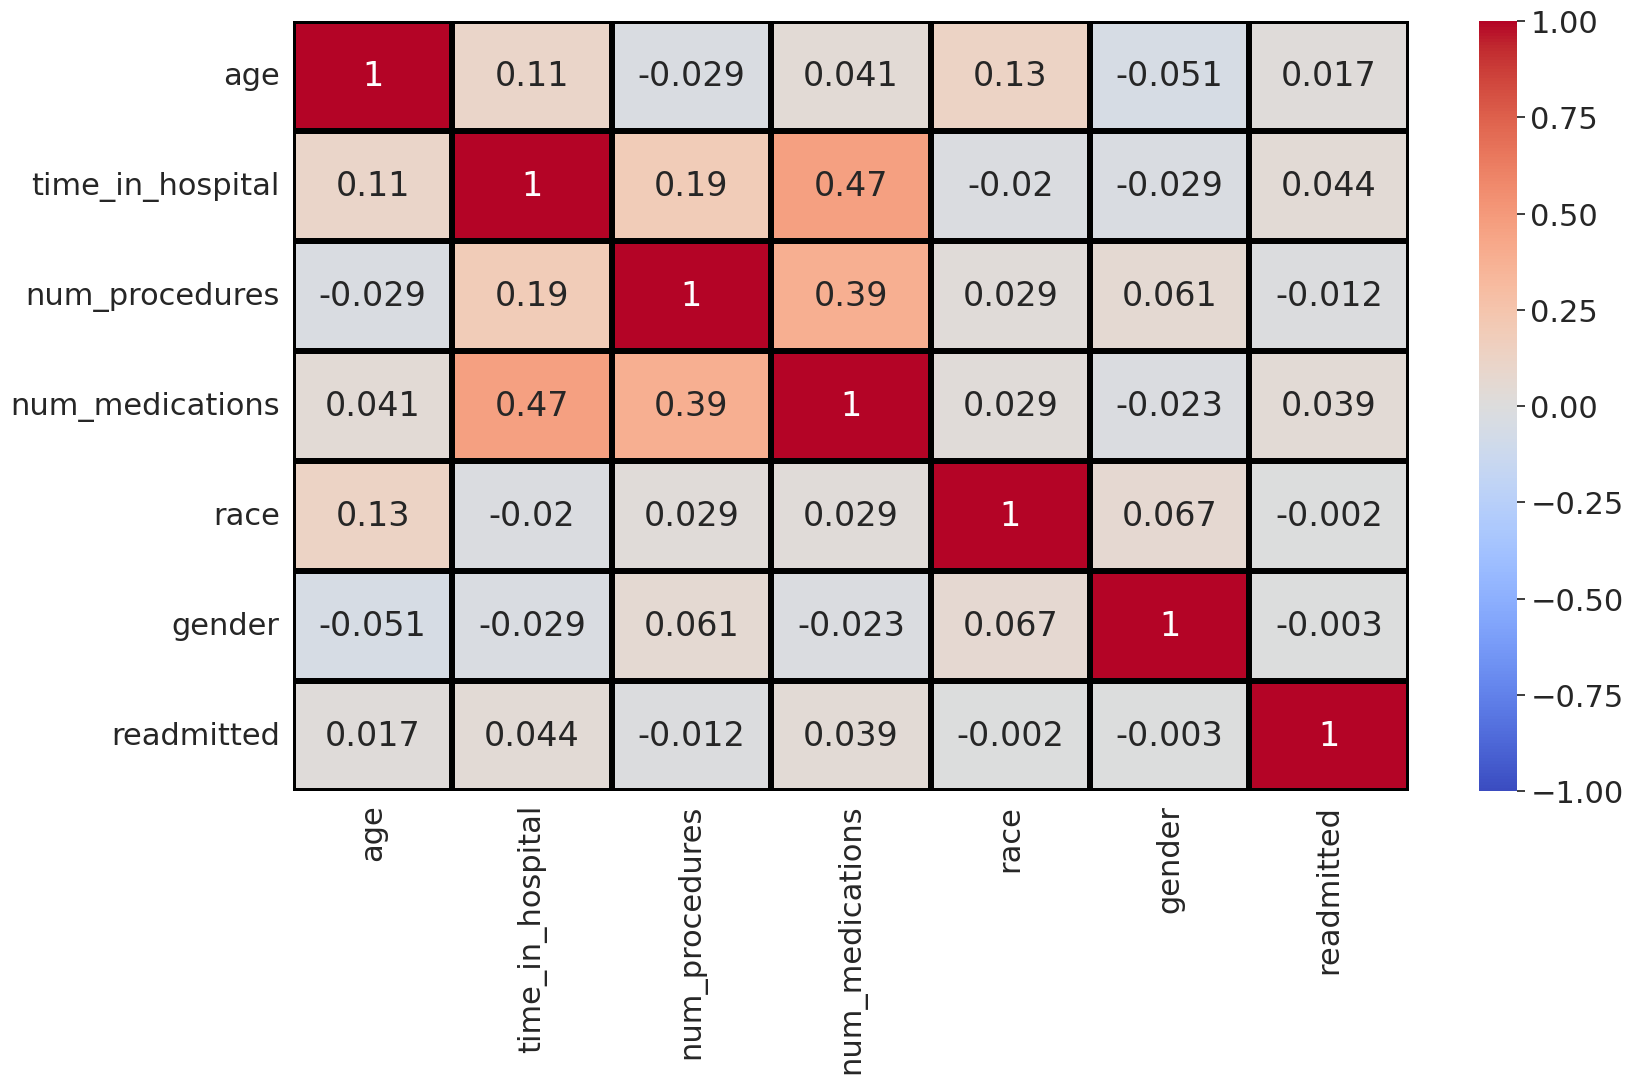

In [28]:
fix, ax = plt.subplots(figsize = (18, 10))
sns.set(font_scale = 2)
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center =0, cmap = 'coolwarm', linewidths=3, linecolor='black',)

In [29]:
# Split our preprocessed data into our features and target arrays
y = df['readmitted']
X = df.drop(columns = ["readmitted"], axis=1)
X

,age,time_in_hospital,num_procedures,num_medications,race,gender
0,5,1,0,1,2,0
1,15,3,0,18,2,0
2,25,2,5,13,0,0
3,35,2,1,16,2,1
4,45,1,0,8,2,1
...,...,...,...,...,...,...
101761,75,3,0,16,0,1
101762,85,5,3,18,0,0
101763,75,1,0,9,2,1
101764,85,10,2,21,2,0


In [30]:
X.describe()

,age,time_in_hospital,num_procedures,num_medications,race,gender
count,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000
mean,65.955253,4.398454,1.340540,16.026545,1.658123,0.461514
std,15.943714,2.986972,1.703686,8.119809,0.861902,0.498519
min,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,2.000000,0.000000,10.000000,2.000000,0.000000
50%,65.000000,4.000000,1.000000,15.000000,2.000000,0.000000
75%,75.000000,6.000000,2.000000,20.000000,2.000000,1.000000
max,95.000000,14.000000,6.000000,81.000000,4.000000,1.000000


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state= 42)

In [32]:
y_train.value_counts()

readmitted
0    70660
1     8933
Name: count, dtype: int64

In [46]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [34]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((79593, 6), (19899, 6), (79593,), (19899,))

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [36]:
# Initialize Classifiers
tree= DecisionTreeClassifier(random_state=24,class_weight='balanced') # using the random state for reproducibility
forest= RandomForestClassifier(random_state=24,class_weight='balanced')
knn= KNeighborsClassifier(class_weight='balanced')
lg = LogisticRegression(fit_intercept=True, solver= 'liblinear', penalty='l1', random_state=24,class_weight='balanced')
# create a list with the objects 
models= [tree, forest, knn, lg]

In [37]:
# Loop through models to determine which model performs best on test set, with time measurements
# Caution: SVM model takes X to run
import timeit

for model in models:
    start = timeit.timeit()
    model.fit(X_train_scaled, y_train) # fit the model
    y_pred= model.predict(X_test) # then predict on the test set
    end = timeit.timeit()
    print(f'Model: {type(model).__name__}')
    print(f'Time to Run: {end - start} seconds')
    print(f'Train Score: {model.score(X_train_scaled, y_train)}')
    print(f'Test Score: {model.score(X_test_scaled, y_test)}\n')

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Model: DecisionTreeClassifier
Time to Run: -0.0005534900000156995 seconds
Train Score: 0.9166132700111819
Test Score: 0.8545655560580934



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Model: RandomForestClassifier
Time to Run: 6.108200000198849e-05 seconds
Train Score: 0.9166007060922443
Test Score: 0.8709482888587367



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Model: KNeighborsClassifier
Time to Run: -0.0012173080000366099 seconds
Train Score: 0.8890354679431608
Test Score: 0.8788381325694758

Model: LogisticRegression
Time to Run: 0.03528743200001827 seconds
Train Score: 0.8877665121304638
Test Score: 0.8876325443489622



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

for model in models:
    model.fit(X_train_scaled, y_train) # fit the model
    y_pred= model.predict(X_test) # then predict on the test set
    print(f'Model: {type(model).__name__}')
    print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
    print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))
    print("F1 is {0:.2f}".format(f1_score(y_test, y_pred)))
    print('\n')

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Model: DecisionTreeClassifier
Accuracy is 0.40
Precision is 0.12
Recall is 0.66
F1 is 0.20




/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Model: RandomForestClassifier
Accuracy is 0.88
Precision is 0.14
Recall is 0.01
F1 is 0.02




/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Model: KNeighborsClassifier
Accuracy is 0.87
Precision is 0.11
Recall is 0.02
F1 is 0.03


Model: LogisticRegression
Accuracy is 0.12
Precision is 0.11
Recall is 0.99
F1 is 0.20




/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [39]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
X_resampled, y_resampled = SMOTE(random_state=24).fit_resample(X_train, y_train)
print('New dataset shape {}'.format(Counter(y_resampled)))

Original dataset shape Counter({0: 70660, 1: 8933})
New dataset shape Counter({0: 70660, 1: 70660})


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X_resampled = pd.DataFrame(X_resampled, columns = list(X.columns))

X_train, X_test1, y_train, y_test1 = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.20, random_state=42)

In [50]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10,class_weight='balanced')
dtree.fit(X_train, y_train)

dtree_pred = dtree.predict(X_test)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)

Accuracy is 0.63
Precision is 0.12
Recall is 0.35


In [52]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier()
rm.fit(X_train, y_train)
rm_prd = rm.predict(X_test)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)

Accuracy is 0.63
Precision is 0.12
Recall is 0.35


In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier()
knn2.fit(X_train, y_train)
knn2_prd = knn2.predict(X_test)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, knn2_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, knn2_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, knn2_prd)))

accuracy_knn2 = accuracy_score(y_test, knn2_prd)
precision_knn2 = precision_score(y_test, knn2_prd)
recall_knn2 = recall_score(y_test, knn2_prd)

Accuracy is 0.70
Precision is 0.67
Recall is 0.77
